# ICS2205 - Web Intelligence 60% Assignment
## Task 2 - Graph Analytics

        - Francesca Maria Mizzi 118201L

The aim of this task is to use the Twitter dataset to perform some analyses on the underlying mention graph. The mention graph is based off of the person tweeting and the person mentioned in the tweet. Both and tweeter and person mentioned are represented as nodes while the mention is the edge so "tweeter" -> mentions -> "mentioned".

The first step to create the mention graph is to import the necessary python libraries. 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import re
from IPython.display import Image
import collections

We must then retrieve the data we need to parse to create the graph. In this case, the data was stored in a tab-seperated file which we read as a .csv file, using tabulation as the seperator between columns. The data is then given column names since none where provided. This is done to make the calling of this data easier later on.

In [104]:
tsv_file = 'twitter.tsv'
data = pd.read_csv(tsv_file, sep='\t')
data.columns = ['date','user','tweet']


The relevent data is then assigned to a variable to make it easier to refer to. In this case, we require the user (the person who tweeted) and the contents of the tweet since that is where the username of the person mentioned is contained.

In [45]:
users = data.user
tweets = data.tweet

The graph is then initialized

In [5]:
graph = nx.DiGraph()

The next step is to add the edges to the graph. However, this cannot be done right away since the username of the person mentioned has not been acquired yet, it is still stored within the tweet with the rest of the text. The first step of retrieving the mentioned username is to search through the tweets and checking if anyone is mentioned in the tweets since you don't always need to mention someone. The tweets without mentions are filtered out. Since we now have all the tweets with mentions in them, the username is retreived by taking the word and removing the "@" symbol from in front of this since only the username is required. An edge is then created from the person tweeted and the person mentioned having a weight of 1. If the edge already exists, with weight is increased by 1.

One of the main challenges I faced when trying to retrieve the user name was how to get the full mention (for example "@user") rather than just the "@" symbol which happened a lot as I tried to complete this task. This was a problem since I was searching the tweet for the "@" symbol and needed to find a way to retrieve the word after it as well rather than just the symbol. I solved this by understanding further the "re" library which allowed to adjust what I searched for by using the re.compile() method.

In [6]:
regex = re.compile('@')
entry = 0
for row in tweets:
    phrase = tweets[entry]
    tweeter = users[entry]
    if (regex.search(phrase) !=  None):
        rex = re.compile(r'@(\w+)')
        mention = rex.match(phrase)
        if mention != None:
            mentioned = mention.group()
            mentioned = mentioned[1:]
            if graph.has_edge(tweeter,mentioned):
                graph[tweeter][mentioned]['weight'] += 1
            else:
                graph.add_edge(tweeter,mentioned, weight = 1)
            
    entry=entry+1


Basic information about the graph is then retreived using the info() method from NetworkX. As can be seen below, the directional graph created is made up of 20,854 nodes and 13,044 edges. The average in degree is also the same as the average out degree at 0.6255.

In [7]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 20854
Number of edges: 13044
Average in degree:   0.6255
Average out degree:   0.6255


The next piece of information to acquire it the degree distribution of the graph which is represented through the histogram seen below.

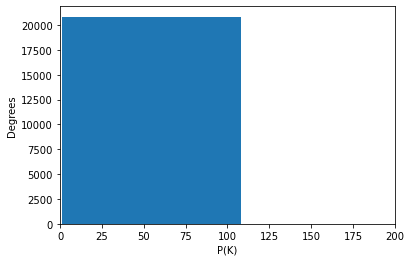

In [105]:
def plot_degree_dist(graph):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, bins = 2)
    plt.xlim(0, 200)
    plt.ylabel("Degrees")
    plt.xlabel("P(K)")
    plt.show()

plot_degree_dist(graph)

The next part of the analysis is to calculate the average path length of the graph. This is the average length of the shortest paths between the nodes in the graph. In order to use the library command of average_shortest_path_length(), we must first convert the graph to a path graph. A path graph is a graph P_n of n nodes linearly connected by n-1 edges. We can see that the average path length of the graph is found to be 6951.67.

In [106]:
Ga = nx.path_graph(graph)
print("Average path length: ",nx.average_shortest_path_length(Ga))

Average path length:  6951.666666666667


We must then calculate the global clustering coefficient. The clustering coefficient is ratio of the number of connections between the neighbours of each node and the total number of possible connections between the same neighbours.
Unfortunately, due to hardware restrictions, any attempt to calculate the clustering coefficient restulted in the notebook crashing. This was also attempted on largest subgraph, resulting the same problem.

In [ ]:
Gc = nx.complete_graph(graph)
print("Global clustering coefficient: ",nx.clustering(Gc))

As we can see below, the mention graph is connected which means that there is a path from any point to any other point in the graph. We can also see that there are in fact 5 giant strongly connected components in the mention graph.

In [108]:
print(nx.is_connected(Ga))

True


In [114]:
giant = sorted(nx.strongly_connected_components(graph), key=len, reverse=True)[0]
print(giant)

{'amatecha', 'iphoneincanada', 'hardcoreware', 'stephenfung', 'reneritchie'}


The penultimate task is to generate a list of the top 10 users in the tweets based off 3 criteria:  degree, closeness and betweenness centrality measures. Initially I thought this to be a straightforward task; I retreive the values for each criteria and rank them in three seperate lists. However, on further inspection, I realized that it was more complicated since I needed to generate 1 list with all three criteria in mind. After multiple attemps, the method I chose to do this was as follows: to first create three lists which ranks each user based on the seperate criteria. I then give each user a value or "points" for each criteria with the top user having the most points and the bottom user having the least (1 point) as seen below.

In [65]:
sortdegreegraph = sorted(graph.degree, key=lambda x: x[1], reverse=True)
namedegreesort = [i[0] for i in sortdegreegraph]
topdegree = []
count=0
value=len(namedegreesort)
for x in namedegreesort:
    topdegree.append((namedegreesort[count],value))
    count=count+1
    value=value-1
print(topdegree)

[('squarespace', 20854), ('evansrobert', 20853), ('iphone_dev', 20852), ('squaretrackle', 20851), ('iphonefan', 20850), ('theiphoneblog', 20849), ('bingwaves', 20848), ('MuscleNerd', 20847), ('tysiphonehelp', 20846), ('mac0s', 20845), ('mizamandareed', 20844), ('iphoneincanada', 20843), ('avanirvl', 20842), ('relighy', 20841), ('ijustine', 20840), ('TweetDeck', 20839), ('prathamesh_n', 20838), ('jeenniiffeerr7', 20837), ('iphoniacsfr', 20836), ('iphonefanblog', 20835), ('trackle', 20834), ('iPhoneclubNL', 20833), ('marigoholdings', 20832), ('shreyas_s', 20831), ('ravalashish', 20830), ('pimpyouriphone', 20829), ('raul29m', 20828), ('alisa_gilroy', 20827), ('jackie_tweetin', 20826), ('talosman', 20825), ('iphoneos30', 20824), ('tweetlilshawty7', 20823), ('iPhoneBlog', 20822), ('perpetualicon', 20821), ('tweetdeck', 20820), ('tracy_mize', 20819), ('O2', 20818), ('tmobile_iphone', 20817), ('jessey_lemeds', 20816), ('dannyking2', 20815), ('aplusk', 20814), ('iphonefathersda', 20813), ('Squ

In [59]:
sortclosegraph = sorted(nx.closeness_centrality(graph), key=lambda x: x[1], reverse=True)
topclose = []
count=0
value=len(sortclosegraph)
for x in sortclosegraph:
    topclose.append((sortclosegraph[count],value))
    count=count+1
    value=value-1
print(topclose)

[('bzogleman', 20854), ('azn2nr', 20853), ('izzynobre', 20852), ('az_iscarian', 20851), ('azurefields', 20850), ('mzampino', 20849), ('ezlistening', 20848), ('dzawistowski', 20847), ('pzC002', 20846), ('zzzooey', 20845), ('azingchild', 20844), ('fzo', 20843), ('azurashahrim', 20842), ('dzakyem', 20841), ('jzahariades', 20840), ('azpace', 20839), ('gzairborne', 20838), ('azuwanjuna', 20837), ('bziphone', 20836), ('pzepernick', 20835), ('azteca007', 20834), ('Azizco910', 20833), ('azurewraith', 20832), ('izatrini', 20831), ('izzyLizard', 20830), ('mz_jonez87', 20829), ('MzTiffanie', 20828), ('ezsoulja', 20827), ('mz_blackbarbie', 20826), ('jzbl', 20825), ('azom', 20824), ('azocleantech', 20823), ('kzt', 20822), ('jzeitler', 20821), ('mzjaygee', 20820), ('Azguyphx', 20819), ('azure413', 20818), ('zzgavin', 20817), ('mzmraz', 20816), ('azazyl', 20815), ('izmrk', 20814), ('dzpinoy', 20813), ('aznmclovin', 20812), ('Ozreiuosn', 20811), ('bzmie3', 20810), ('azsgreen', 20809), ('nzchrissy', 20

In [43]:
sortbcgraph = sorted(nx.betweenness_centrality(graph), key=lambda x: x[1], reverse=True)
topbc = []
count=0
value=len(sortbcgraph)
for x in sortbcgraph:
    topbc.append((sortbcgraph[count],value))
    count=count+1
    value=value-1
print(topbc)


[('bzogleman', 20854), ('azn2nr', 20853), ('izzynobre', 20852), ('az_iscarian', 20851), ('azurefields', 20850), ('mzampino', 20849), ('ezlistening', 20848), ('dzawistowski', 20847), ('pzC002', 20846), ('zzzooey', 20845), ('azingchild', 20844), ('fzo', 20843), ('azurashahrim', 20842), ('dzakyem', 20841), ('jzahariades', 20840), ('azpace', 20839), ('gzairborne', 20838), ('azuwanjuna', 20837), ('bziphone', 20836), ('pzepernick', 20835), ('azteca007', 20834), ('Azizco910', 20833), ('azurewraith', 20832), ('izatrini', 20831), ('izzyLizard', 20830), ('mz_jonez87', 20829), ('MzTiffanie', 20828), ('ezsoulja', 20827), ('mz_blackbarbie', 20826), ('jzbl', 20825), ('azom', 20824), ('azocleantech', 20823), ('kzt', 20822), ('jzeitler', 20821), ('mzjaygee', 20820), ('Azguyphx', 20819), ('azure413', 20818), ('zzgavin', 20817), ('mzmraz', 20816), ('azazyl', 20815), ('izmrk', 20814), ('dzpinoy', 20813), ('aznmclovin', 20812), ('Ozreiuosn', 20811), ('bzmie3', 20810), ('azsgreen', 20809), ('nzchrissy', 20

The next step was to sort all three lists based on the user name in alphabetical order so that it is easier to manipulate since the first entry of each list will be for the same user, the 20th entry of each list will be for the same user, etc. Initially, the approach was to take the username and search for the corresponding username in each list however my method of sorting the lists was found to be simpler.

The "points" aquired in each criteria list where then added together and divided by 3 in order to generate an average point score. Each user is then ranked based off of this calculated point score which takes into account all three criteria. If necessary, this can also generate the top 50 users or the top n users since all the users have an average score. 

In [94]:
topdegree.sort()
topclose.sort()
topbc.sort()
usernames = [i[0] for i in topdegree]

n = 0
useraverages = []

for name in usernames:
    current = (topdegree[n], topclose[n], topbc[n])
    values = [x[1] for x in current]
    average = (values[0]+values[1]+values[2])/3
    
    useraverages.append((usernames[n], average))
    
    n=n+1
sortedaverages = sorted(useraverages, key=lambda x: x[1], reverse=True)
sortedusers = usernames = [i[0] for i in sortedaverages]

print("Top 10 users: ")

for x in range(10):
    print(x+1, ": ",sortedusers[x])

Top 10 users: 
1 :  izzynobre
2 :  tysiphonehelp
3 :  bziphone
4 :  wyldceltic1
5 :  tymoss
6 :  kyriii
7 :  typezero3
8 :  ayazs
9 :  az_iscarian
10 :  myohmy2boys


The final part of the task is to generate a visualisation for the mention graph using a size-color-valuation scheme. I chose to implement the following scheme: the size of the nodes is based off its degree so the larger a node, the larger its degree. The colour of the edges is based off its weight so if an edge has weight 1, it is blue, weight 2 it is green, weight less than or equal to 20 but greater or equal to 3, it is yellow, weight less than or equal to 100 but greater than 20, it is orange and weight greater than 100 makes it red.

In [101]:
list_degree=list(graph.degree())
nodes , degree = map(list, zip(*list_degree))
edges = graph.edges()

weights = [graph[u][v]['weight'] for u,v in edges]

eblue=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] ==1]
egreen=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] ==2]
eyellow=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] <=20 and d['weight']>=3]
eorange=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] <=100 and d['weight']>20]
ered=[(u,v) for (u,v,d) in graph.edges(data=True) if d['weight'] >100]

The graph is then plotted, plotting first the nodes and then the edges.

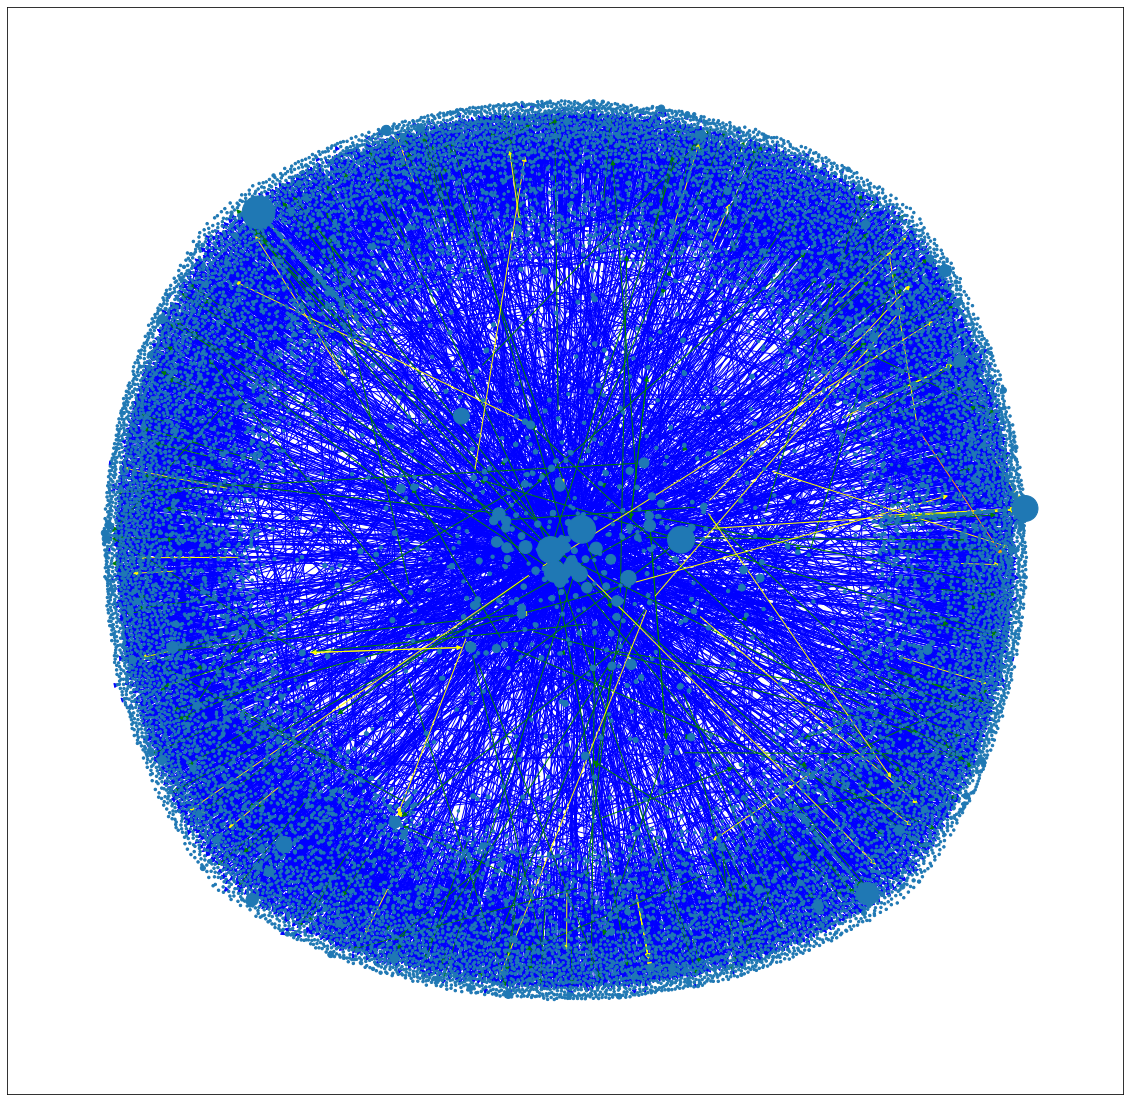

In [103]:
pos = nx.spring_layout(graph)
plt.figure(3,figsize=(20,20)) 

nx.draw_networkx_nodes(graph, pos,nodelist=nodes, node_size=[(v * 5)+1 for v in degree])

nx.draw_networkx_edges(graph, pos, edgelist=eblue, width=1, edge_color='b')
nx.draw_networkx_edges(graph, pos, edgelist=egreen, width=1, edge_color='g')
nx.draw_networkx_edges(graph, pos, edgelist=eyellow, width=1, edge_color="yellow")
nx.draw_networkx_edges(graph, pos, edgelist=eorange, width=1, edge_color="orange")
nx.draw_networkx_edges(graph, pos, edgelist=ered, width=1, edge_color='r')

plt.show()

As can be seen in the graph above, it is very clear that the majority of edges are blue, meaning that a majority of users have either mentioned another user once or been mentioned by another user once.